In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv("Mall_customers.csv")

In [5]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
x=dataset.iloc[:, [3, 4]].values

<function matplotlib.pyplot.show(close=None, block=None)>

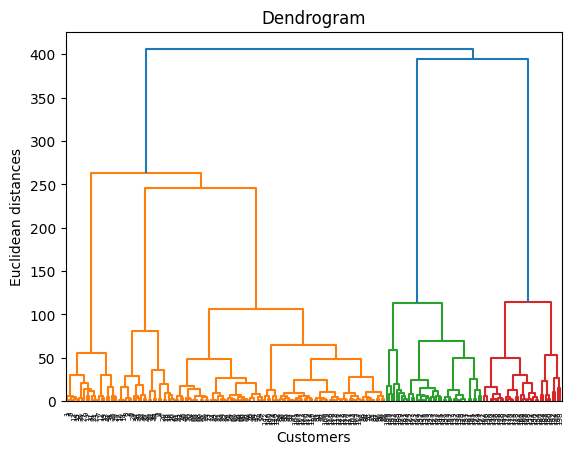

In [9]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method ='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show

In [25]:
from sklearn.cluster import AffinityPropagation
clustering = AffinityPropagation(random_state=0)
clustering.fit(x)

AffinityPropagation(random_state=0)

In [15]:
supervised = pd.DataFrame(dataset)

In [17]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [18]:
supervised['cluster_group']=clustering

In [19]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,AffinityPropagation(random_state=5)
1,2,Male,21,15,81,AffinityPropagation(random_state=5)
2,3,Female,20,16,6,AffinityPropagation(random_state=5)
3,4,Female,23,16,77,AffinityPropagation(random_state=5)
4,5,Female,31,17,40,AffinityPropagation(random_state=5)
...,...,...,...,...,...,...
195,196,Female,35,120,79,AffinityPropagation(random_state=5)
196,197,Female,45,126,28,AffinityPropagation(random_state=5)
197,198,Male,32,126,74,AffinityPropagation(random_state=5)
198,199,Male,32,137,18,AffinityPropagation(random_state=5)


C:\Users\Hp\Anaconda3\envs\aiml\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


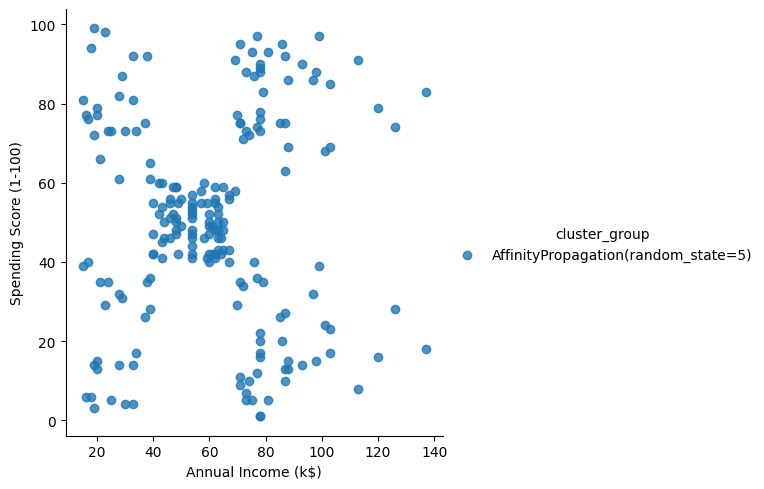

In [22]:
import seaborn as sns
facet = sns.lmplot(data = supervised, x=supervised.columns[3],y=supervised.columns[4], hue=supervised.columns[5],
                  fit_reg = False,legend = True,legend_out = True)